In [1]:
import numpy as np 
import pandas as pd 
import scipy as sp
import matplotlib.pyplot as plt
import gzip, pickle, sys 

%matplotlib inline

In [2]:
f = gzip.open('Datasets/mnist.pkl.gz', 'rb')
(input_train, output_train), (input_test, output_test), _ = pickle.load(f, encoding='bytes')

## PCA 

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(input_train)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
x_train = pca.transform(input_train)


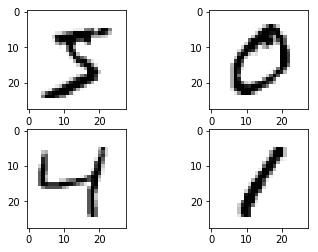

In [5]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(input_train[i].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

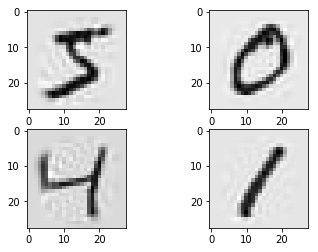

In [6]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(pca.inverse_transform(x_train)[i].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest' )
plt.show()

# NOW Auto Encoder


In [7]:
import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras import regularizers
from keras.optimizers import Adam, Nadam, RMSprop, Adadelta
from keras.models import Model
from keras.activations import sigmoid

Using TensorFlow backend.


In [20]:

inputs = Input(shape=(784,))


model = Dense(600, activation='tanh')(inputs)
model = Dropout(0.8)(model)

model = Dense(500, activation='tanh')(model)
model = Dropout(0.8)(model)


model = Dense(400, activation='tanh')(model)


model = Dense(300, activation='tanh')(model)
model = Dropout(0.5)(model)


model = Dense(200,activation='tanh')(model)


model = Dense(300, activation='tanh')(model)


model = Dense(400, activation='tanh')(model)

model = Dense(500, activation='tanh')(model)
model = Dropout(0.8)(model)

model = Dense(600, activation='tanh')(model)

model = Dense(784)(model)
opt=Adam(lr=0.005, decay=1e-2)
ae = Model(input = inputs, output = model)
ae.compile(optimizer=keras.optimizers.Adam(), loss='mean_squared_error')


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [21]:
ae.fit(input_train, input_train, epochs= 20, batch_size = 128, shuffle=True)


Epoch 1/20
50000/50000 [==============================] - 30s 596us/step - loss: 0.0683
Epoch 2/20
50000/50000 [==============================] - 30s 594us/step - loss: 0.0483
Epoch 3/20
50000/50000 [==============================] - 34s 680us/step - loss: 0.0455
Epoch 4/20
50000/50000 [==============================] - 32s 635us/step - loss: 0.0440
Epoch 5/20
50000/50000 [==============================] - 33s 670us/step - loss: 0.0427
Epoch 6/20
50000/50000 [==============================] - 35s 706us/step - loss: 0.0417
Epoch 7/20
50000/50000 [==============================] - 30s 604us/step - loss: 0.0409
Epoch 8/20
50000/50000 [==============================] - 30s 605us/step - loss: 0.0403
Epoch 9/20
50000/50000 [==============================] - 30s 599us/step - loss: 0.0397
Epoch 10/20
50000/50000 [==============================] - 30s 600us/step - loss: 0.0392
Epoch 11/20
50000/50000 [==============================] - 30s 601us/step - loss: 0.0389
Epoch 12/20
50000/50000 [=====

In [22]:
a =ae.predict(input_train)

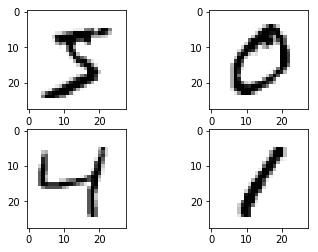

In [27]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(input_train[i].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

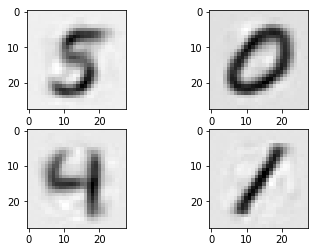

In [23]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(a[i].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest' )
plt.show()

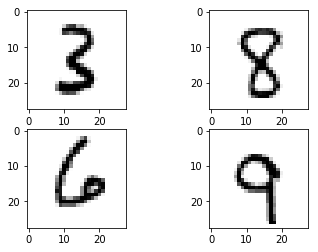

In [24]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(input_test[i].reshape((28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [25]:
a =ae.predict(input_test)

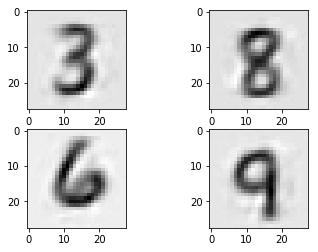

In [26]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(a[i].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest' )
plt.show()